<h1> Unit 6 Assignment </h1>
<h2> Decision Tree on MLB Hall of Fame </h2>
<h2> By: Ryan Moore </h2>


In [109]:
await micropip.install(['seaborn', 'matplotlib', 'pandas', 'numpy', 'imblearn'])

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [128]:
df = pd.read_csv('MLBHOF.csv')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      1340 non-null   object 
 1   Number Of Seasons Played  1340 non-null   int64  
 2   Games Played              1340 non-null   int64  
 3   Official At-Bats          1340 non-null   int64  
 4   Runs Scored               1340 non-null   int64  
 5   Hits                      1340 non-null   int64  
 6   Doubles                   1340 non-null   int64  
 7   Triples                   1340 non-null   int64  
 8   Home Runs                 1340 non-null   int64  
 9   Runs Batted In            1340 non-null   int64  
 10  Walks                     1340 non-null   int64  
 11  Strikeouts                1320 non-null   float64
 12  Batting Average           1340 non-null   float64
 13  On Base Percentage        1340 non-null   float64
 14  Slugging

In [130]:
df.describe()

,Number Of Seasons Played,Games Played,Official At-Bats,Runs Scored,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strikeouts,Batting Average,On Base Percentage,Slugging Percentage,Adjusted Production,Batting Runs,Adjusted Batting Runs,Runs Created,Stolen Bases,Caught Stealing,Stolen Base Runs,Fielding Average,Fielding Runs,Total Player Rating,Hall Of Fame Membership
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1320.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1338.000000,1076.000000,718.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,13.485821,1331.263433,4534.612687,635.313433,1248.567164,203.225373,50.811940,85.109701,565.744776,445.584328,445.685606,0.268774,0.336064,0.385355,99.899254,37.556716,35.258209,657.077612,104.447683,37.822491,-3.086351,0.966370,5.958955,3.530896,0.142537
std,3.136279,519.165125,2094.191124,376.400804,647.664709,116.576053,41.038358,97.930043,357.163666,295.214016,325.319204,0.026179,0.033701,0.060565,22.445277,169.282249,167.630009,416.199407,125.573922,34.336598,13.315433,0.025193,63.144705,15.188289,0.471579
min,10.000000,140.000000,252.000000,20.000000,48.000000,6.000000,0.000000,0.000000,21.000000,17.000000,0.000000,0.161000,0.194000,0.201000,20.000000,-310.000000,-341.000000,16.000000,0.000000,0.000000,-31.000000,0.820000,-235.000000,-28.900000,0.000000
25%,11.000000,958.750000,2979.500000,355.000000,766.500000,116.000000,22.000000,22.000000,307.750000,232.000000,218.000000,0.252000,0.315000,0.343000,84.000000,-62.000000,-63.000000,355.000000,22.000000,13.000000,-9.000000,0.957000,-30.250000,-5.500000,0.000000
50%,13.000000,1282.500000,4302.000000,575.000000,1168.000000,184.500000,40.000000,51.000000,486.000000,380.000000,365.500000,0.267000,0.335000,0.380000,99.000000,-2.000000,-3.000000,578.000000,56.500000,28.000000,-5.000000,0.973000,0.500000,0.000000,0.000000
75%,15.000000,1651.500000,5815.250000,843.250000,1613.000000,264.000000,69.000000,108.000000,735.250000,576.000000,593.000000,0.285000,0.357250,0.424000,114.000000,98.500000,95.250000,873.500000,143.000000,55.000000,-1.000000,0.983000,36.000000,8.400000,0.000000
max,26.000000,3562.000000,14053.000000,2246.000000,4256.000000,792.000000,309.000000,755.000000,2297.000000,2056.000000,2597.000000,0.366000,0.483000,0.690000,209.000000,1322.000000,1355.000000,2838.000000,938.000000,307.000000,110.000000,1.000000,369.000000,105.200000,2.000000


Text(0.5, 1.0, 'Histogram: Runs Batted In')

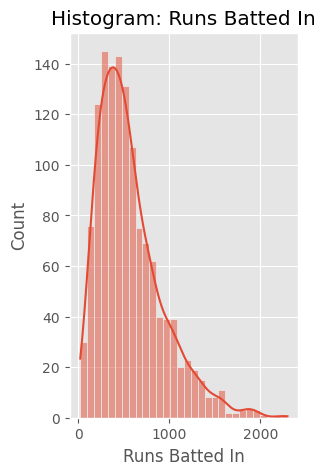

In [131]:
# Histogram of Runs Batted In
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 2)
sns.histplot(df['Runs Batted In'], kde=True, bins=30)
plt.title('Histogram: Runs Batted In')

Text(0.5, 1.0, 'Histogram: Home Runs')

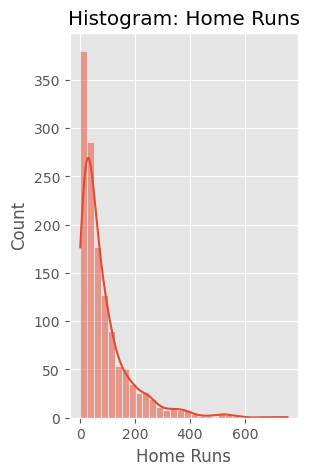

In [132]:
# Histogram of Home Runs 
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 2)
sns.histplot(df['Home Runs'], kde=True, bins=30)
plt.title('Histogram: Home Runs')

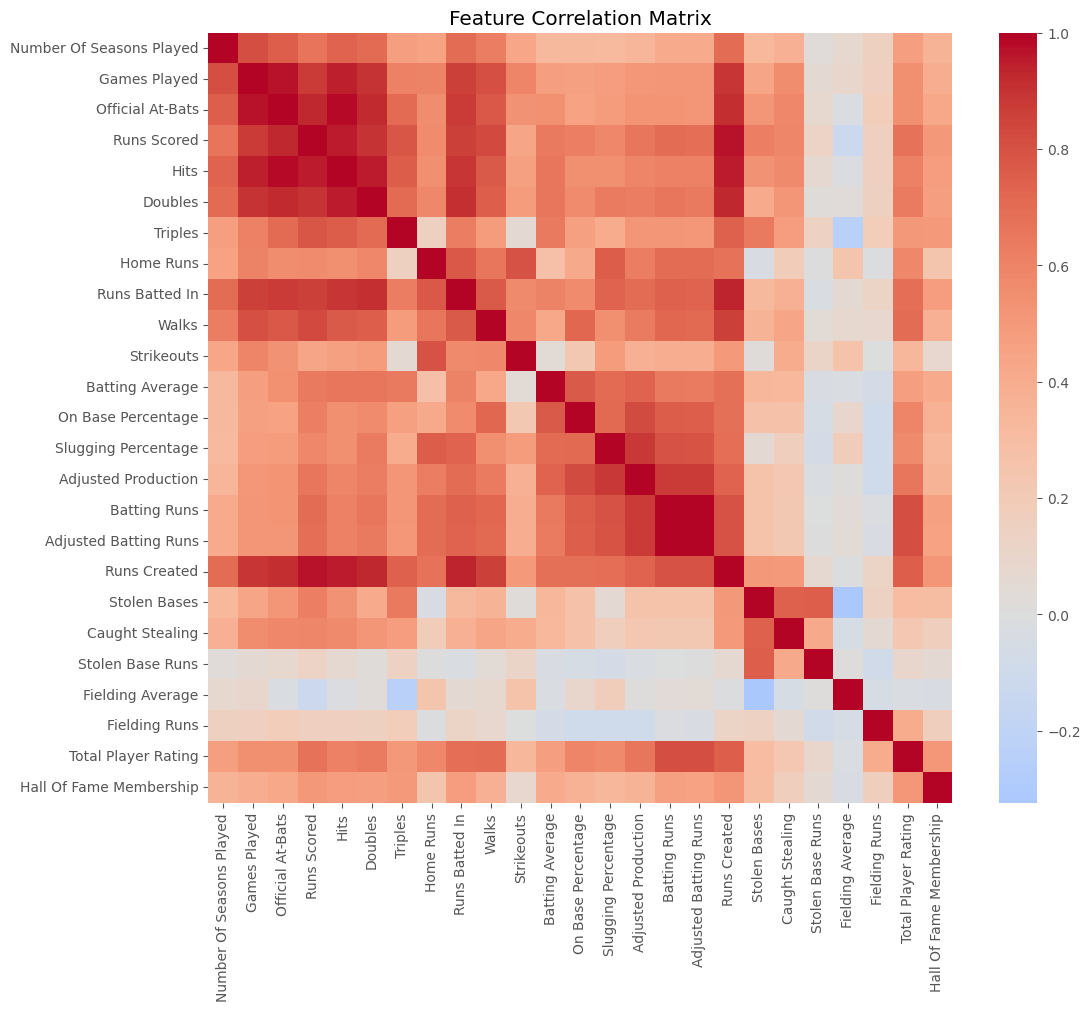

Hall Of Fame Membership    1.000000
Runs Created               0.523199
Total Player Rating        0.511347
Runs Scored                0.506977
Triples                    0.495956
Hits                       0.480650
Runs Batted In             0.478825
Doubles                    0.468827
Batting Runs               0.462369
Adjusted Batting Runs      0.456298
Name: Hall Of Fame Membership, dtype: float64
Adjusted Production         0.367690
Number Of Seasons Played    0.363671
Slugging Percentage         0.342104
Stolen Bases                0.299382
Home Runs                   0.250222
Fielding Runs               0.172196
Caught Stealing             0.165601
Strikeouts                  0.081019
Stolen Base Runs            0.060275
Fielding Average           -0.038390
Name: Hall Of Fame Membership, dtype: float64


In [133]:
#Heatmap of Features Correlation

plt.figure(figsize=(12, 10))
numerical_df = df.select_dtypes(include=['number'])
corr = numerical_df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()

target_corr = corr['Hall Of Fame Membership'].sort_values(ascending=False)
print(target_corr.head(10))  # top positive
print(target_corr.tail(10))  # top negative


<h3> Preprocessing</h3>

In [134]:
# Apply median imputation to the specified columns
strikeouts_mean = df['Strikeouts'].mean()
df['Strikeouts'] = df['Strikeouts'].fillna(strikeouts_mean)

stolenbases_mean = df['Stolen Bases'].mean()
df['Stolen Bases'] = df['Stolen Bases'].fillna(stolenbases_mean)

caughtstealing_mean = df['Caught Stealing'].mean()
df['Caught Stealing'] = df['Caught Stealing'].fillna(caughtstealing_mean)

stolenbaseruns_mean = df['Stolen Base Runs'].mean()
df['Stolen Base Runs'] = df['Stolen Base Runs'].fillna(stolenbaseruns_mean)

#Replace 2 values in Hall Of Fame Membership with 1
df['Hall Of Fame Membership'] = df['Hall Of Fame Membership'].replace([2], 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      1340 non-null   object 
 1   Number Of Seasons Played  1340 non-null   int64  
 2   Games Played              1340 non-null   int64  
 3   Official At-Bats          1340 non-null   int64  
 4   Runs Scored               1340 non-null   int64  
 5   Hits                      1340 non-null   int64  
 6   Doubles                   1340 non-null   int64  
 7   Triples                   1340 non-null   int64  
 8   Home Runs                 1340 non-null   int64  
 9   Runs Batted In            1340 non-null   int64  
 10  Walks                     1340 non-null   int64  
 11  Strikeouts                1340 non-null   float64
 12  Batting Average           1340 non-null   float64
 13  On Base Percentage        1340 non-null   float64
 14  Slugging

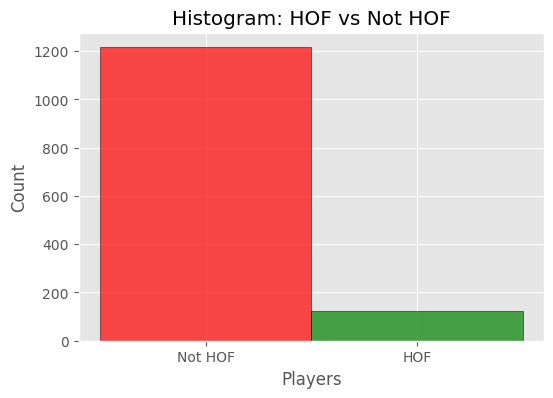

In [135]:
# Histogram of Hall of Fame
plt.figure(figsize=(6, 4))
hof_players = df[df['Hall Of Fame Membership'] == 1]
not_hof_players = df[df['Hall Of Fame Membership'] == 0]
plt.hist(hof_players['Hall Of Fame Membership'], bins=1, edgecolor='black', color='green', label='HOF', alpha=0.7)
plt.hist(not_hof_players['Hall Of Fame Membership'], bins=1, edgecolor='black', color='red', label='Not HOF', alpha=0.7)
plt.xticks([0, 1], ['Not HOF', 'HOF']) 
plt.xlabel('Players')
plt.ylabel('Count')
plt.title('Histogram: HOF vs Not HOF')
plt.show()

In [136]:
#Drop Name and Position as both are objects to leave only numerical categories
df.drop('Name', axis=1, inplace=True)
df.drop('Primary Position Played', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Number Of Seasons Played  1340 non-null   int64  
 1   Games Played              1340 non-null   int64  
 2   Official At-Bats          1340 non-null   int64  
 3   Runs Scored               1340 non-null   int64  
 4   Hits                      1340 non-null   int64  
 5   Doubles                   1340 non-null   int64  
 6   Triples                   1340 non-null   int64  
 7   Home Runs                 1340 non-null   int64  
 8   Runs Batted In            1340 non-null   int64  
 9   Walks                     1340 non-null   int64  
 10  Strikeouts                1340 non-null   float64
 11  Batting Average           1340 non-null   float64
 12  On Base Percentage        1340 non-null   float64
 13  Slugging Percentage       1340 non-null   float64
 14  Adjusted

In [180]:
# Split features and target
X = df.drop('Hall Of Fame Membership', axis=1)
y = df['Hall Of Fame Membership']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [181]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [182]:
y_pred = dtc.predict(X_test)

In [183]:
# Classification results
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       370
           1       0.61      0.69      0.65        32

    accuracy                           0.94       402
   macro avg       0.79      0.82      0.81       402
weighted avg       0.94      0.94      0.94       402

Confusion Matrix:
[[356  14]
 [ 10  22]]


In [184]:
# Split features and target
X = df.drop('Hall Of Fame Membership', axis=1)
y = df['Hall Of Fame Membership']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [185]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
# Classification results
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       489
           1       0.63      0.70      0.67        47

    accuracy                           0.94       536
   macro avg       0.80      0.83      0.82       536
weighted avg       0.94      0.94      0.94       536

Confusion Matrix:
[[470  19]
 [ 14  33]]
